In [48]:
import pingouin as pg
import pandas as pd
import numpy as np
import pyreadstat
from scipy import stats
import matplotlib.pyplot as plt

df, meta = pyreadstat.read_sav('Student.sav')
# Basic description
desc = df.describe()
print(df.head())

# Calculate additional statistics
mean = df.mean()
median = df.median()
mode = df.mode().iloc[0]  # .mode() returns a DataFrame, use the first row
std_dev = df.std()
variance = df.var()
data_range = df.max() - df.min()
skewness = df.skew()
kurtosis = df.kurtosis()
# Add additional statistics to the description
desc.loc['mean'] = mean
desc.loc['median'] = median
desc.loc['mode'] = mode
desc.loc['std_dev'] = std_dev
desc.loc['variance'] = variance
desc.loc['range'] = data_range
desc.loc['skewness'] = skewness
desc.loc['kurtosis'] = kurtosis
# Display the enhanced description
print(desc)


   Gender  Program  YearLevel  Question01  Question02  Question03  \
0     1.0      1.0        3.0         1.0         1.0         5.0   
1     1.0      1.0        3.0         1.0         2.0         5.0   
2     2.0      2.0        3.0         3.0         5.0         5.0   
3     1.0      1.0        2.0         2.0         2.0         5.0   
4     2.0      1.0        1.0         1.0         2.0         3.0   

   AverageGrade  Asses01  Asses02  BirthDay  BirthMonth  BirthYear  
0         89.53  31000.0  33000.0      18.0         2.0     2001.0  
1         99.10  31000.0  40000.0      24.0        10.0     2000.0  
2         82.00  40000.0  31000.0      13.0         5.0     2001.0  
3         82.40  40000.0  37000.0      22.0         3.0     2000.0  
4         88.00  39000.0  33000.0      11.0         8.0     2003.0  
             Gender    Program  YearLevel  Question01  Question02  Question03  \
count     30.000000  30.000000  30.000000   30.000000   30.000000   30.000000   
mean     

Pearson Correlation Coefficient: -0.0881
P-value: 0.6432
The correlation is not statistically significant (p >= 0.05).


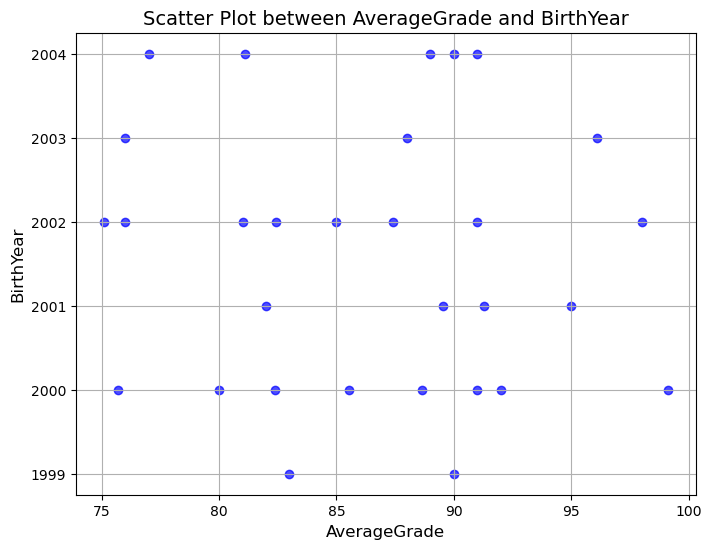

In [3]:
correlation, p_value = stats.pearsonr(df['AverageGrade'], df['BirthYear'])

# Display the Pearson Correlation Coefficient and P-value
print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the correlation is statistically significant (p < 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")

# Plotting the scatter plot (scattergram)
plt.figure(figsize=(8, 6))  # Size of the plot
plt.scatter(df['AverageGrade'], df['BirthYear'], color='blue', alpha=0.7)  # Scatter plot

# Adding labels and title to the scatter plot
plt.title('Scatter Plot between AverageGrade and BirthYear', fontsize=14)
plt.xlabel('AverageGrade', fontsize=12)
plt.ylabel('BirthYear', fontsize=12)

# Displaying the grid for better visibility
plt.grid(True)

# Show the plot
plt.show()

In [4]:
# Convert 'Program' to categorical (if not already) and then to numeric
df['Program'] = df['Program'].astype('category')
df['Program'] = df['Program'].cat.codes  # Converts categorical to numeric codes

# Ensure that 'AverageGrade' and 'BirthDay' are numeric
df['AverageGrade'] = pd.to_numeric(df['AverageGrade'], errors='coerce')
df['BirthDay'] = pd.to_numeric(df['BirthDay'], errors='coerce')

# Drop rows with missing values (if any)
df_clean = df.dropna(subset=['AverageGrade', 'BirthDay', 'Program'])

# Perform Partial Correlation: AverageGrade vs. BirthDay, controlling for Program
partial_corr_result = pg.partial_corr(data=df_clean, x='AverageGrade', y='BirthDay', covar='Program')

# Display the result
print(partial_corr_result)

          n         r          CI95%     p-val
pearson  30  0.213942  [-0.17, 0.54]  0.265109


In [33]:

# Calculate One-Way ANOVA
# Group data by 'YearLevel' and get the 'AverageGrade' for each group
groups = [df['AverageGrade'][df['YearLevel'] == level] for level in df['YearLevel'].unique()]

# Perform One-Way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Calculate Eta-squared for effect size
total_ss = np.sum((df['AverageGrade'] - np.mean(df['AverageGrade']))**2)
between_ss = np.sum([len(group) * (np.mean(group) - np.mean(df['AverageGrade']))**2 for group in groups])
eta_squared = between_ss / total_ss if total_ss != 0 else 0

# Display results
print("One-Way ANOVA Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Eta-squared: {eta_squared:.4f}")

# Additional descriptive statistics by YearLevel
desc_stats = df.groupby('YearLevel')['AverageGrade'].describe()
print("\nDescriptive Statistics by YearLevel:")
print(desc_stats)


One-Way ANOVA Results:
F-statistic: 4.8724
P-value: 0.0156
Eta-squared: 0.2652

Descriptive Statistics by YearLevel:
           count       mean       std   min      25%    50%      75%   max
YearLevel                                                                 
1.0          6.0  87.191667  6.977995  75.1  86.0125  87.70  90.2500  96.1
2.0          8.0  80.687500  3.004491  76.0  79.2500  81.05  82.5500  85.0
3.0         16.0  88.796250  6.738031  75.7  87.1050  90.00  91.4775  99.1


In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Example DataFrame with YearLevel, Program, and AverageGrade columns
# df = pd.read_csv('your_data.csv')  # Replace with your actual data

# Fit the model for Two-Way ANOVA (with interaction)
model = ols('AverageGrade ~ C(YearLevel) + C(Program) + C(YearLevel):C(Program)', data=df).fit()

# Perform the ANOVA
anova_results = anova_lm(model)

# Display the ANOVA results
print("Two-Way ANOVA Results:")
print(anova_results)

# Calculate Eta-squared for effect size (partial eta squared)
# Partial eta-squared can be computed as follows:
anova_results['Eta-squared'] = anova_results['sum_sq'] / (anova_results['sum_sq'] + anova_results['df'] * anova_results['mean_sq'])

# Show Eta-squared values
print("\nEta-squared for each effect:")
print(anova_results[['sum_sq', 'df', 'F', 'PR(>F)', 'Eta-squared']])

# Descriptive statistics for each combination of 'YearLevel' and 'Program'
desc_stats = df.groupby(['YearLevel', 'Program'])['AverageGrade'].describe()

print("\nDescriptive Statistics by YearLevel and Program:")
print(desc_stats)


Two-Way ANOVA Results:
                           df      sum_sq     mean_sq         F    PR(>F)
C(YearLevel)              2.0  356.466822  178.233411  5.166196  0.013617
C(Program)                1.0  136.086838  136.086838  3.944554  0.058559
C(YearLevel):C(Program)   2.0   23.581599   11.790799  0.341763  0.713918
Residual                 24.0  827.998371   34.499932       NaN       NaN

Eta-squared for each effect:
                             sum_sq    df         F    PR(>F)  Eta-squared
C(YearLevel)             356.466822   2.0  5.166196  0.013617          0.5
C(Program)               136.086838   1.0  3.944554  0.058559          0.5
C(YearLevel):C(Program)   23.581599   2.0  0.341763  0.713918          0.5
Residual                 827.998371  24.0       NaN       NaN          0.5

Descriptive Statistics by YearLevel and Program:
                   count       mean        std    min     25%   50%     75%  \
YearLevel Program                                                        

                            OLS Regression Results                            
Dep. Variable:           AverageGrade   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     3.556
Date:                Fri, 22 Nov 2024   Prob (F-statistic):             0.0426
Time:                        19:51:57   Log-Likelihood:                -96.095
No. Observations:                  30   AIC:                             198.2
Df Residuals:                      27   BIC:                             202.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.1427      2.653     32.852      0.0

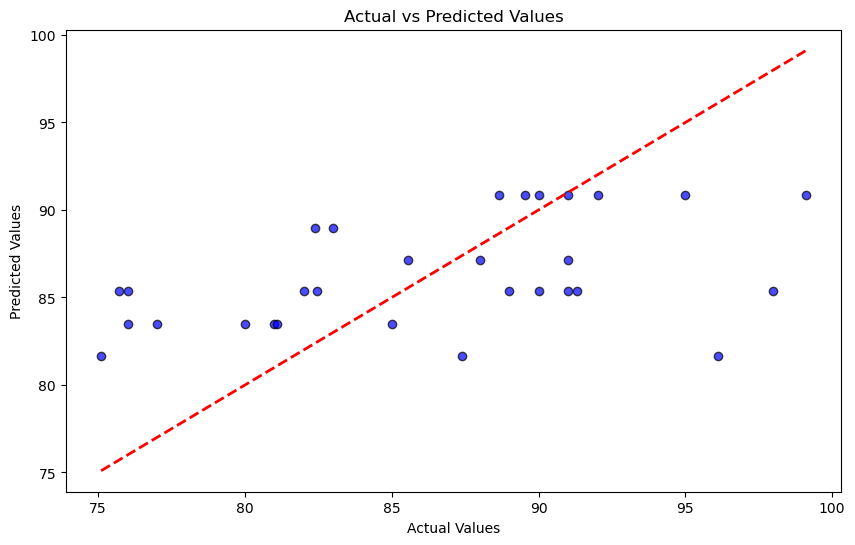

In [50]:
# Prepare the data for regression analysis
df_regression = df[['Program', 'YearLevel', 'AverageGrade']].copy()  # Create a copy to avoid the warning

# Convert categorical variables to numeric using `.loc[]` to avoid the warning
df_regression.loc[:, 'Program'] = df_regression['Program'].astype('category').cat.codes
df_regression.loc[:, 'YearLevel'] = df_regression['YearLevel'].astype('category').cat.codes

# Prepare the independent variables (X) and dependent variable (y)
X = df_regression[['Program', 'YearLevel']]  # Independent variables
y = df_regression['AverageGrade']  # Dependent variable

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Get the regression predictions
y_pred = model.predict(X)

# Predicted vs Actual Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', lw=2)  # Identity line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [70]:
X = df[['Program', 'Question01', 'Question02', 'Question03']]  # Independent variables
y = df['AverageGrade']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)
# Fit the model
model = sm.OLS(y, X).fit()
# Get the model summary
summary = model.summary()
# Extract key results for interpretation
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
f_statistic = model.fvalue
f_pvalue = model.f_pvalue
coefficients = model.params
p_values = model.pvalues


# Interpretation based on the output
print("\n--- Interpretation ---")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
print(f"F-statistic: {f_statistic:.4f}")
print(f"F-pvalue: {f_pvalue:.4f}")
print("\nCoefficients:")
for i, coef in enumerate(coefficients):
    # Use iloc for accessing p-values by position
    print(f"Variable {i}: {coef:.4f} (p-value: {p_values.iloc[i]:.4f})")

# Conclusion based on p-values
for var, p_value in p_values.items():
    if p_value < 0.05:
        print(f"\nThe variable '{var}' is statistically significant with p-value = {p_value:.4f}")
    else:
        print(f"\nThe variable '{var}' is not statistically significant with p-value = {p_value:.4f}")

# Summary Output (This includes all the details, you can also copy it for reporting)
print("\n--- Model Summary ---")
print(summary)


--- Interpretation ---
R-squared: 0.1784
Adjusted R-squared: 0.0469
F-statistic: 1.3570
F-pvalue: 0.2770

Coefficients:
Variable 0: 87.6538 (p-value: 0.0000)
Variable 1: -5.7868 (p-value: 0.0789)
Variable 2: 0.6924 (p-value: 0.4967)
Variable 3: -0.0533 (p-value: 0.9523)
Variable 4: 0.0748 (p-value: 0.9399)

The variable 'const' is statistically significant with p-value = 0.0000

The variable 'Program' is not statistically significant with p-value = 0.0789

The variable 'Question01' is not statistically significant with p-value = 0.4967

The variable 'Question02' is not statistically significant with p-value = 0.9523

The variable 'Question03' is not statistically significant with p-value = 0.9399

--- Model Summary ---
                            OLS Regression Results                            
Dep. Variable:           AverageGrade   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squ

In [62]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Program'] = encoder.fit_transform(df['Program'])  # Converts categorical 'Program' to numeric

# Dependent variable
y = df['AverageGrade']

# Independent variables
X = df[['Program', 'Question01', 'Question02', 'Question03']]

# Add constant to the independent variables matrix for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Extracting key results for interpretation
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
f_statistic = model.fvalue
f_pvalue = model.f_pvalue
coefficients = model.params
p_values = model.pvalues

# Interpretation based on the output
print("\n--- Interpretation ---")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
print(f"F-statistic: {f_statistic:.4f}")
print(f"F-pvalue: {f_pvalue:.4f}")
print("\nCoefficients:")
for i, coef in enumerate(coefficients):
    print(f"Variable {i}: {coef:.4f} (p-value: {p_values[i]:.4f})")

# Conclusion based on p-values
for var, p_value in p_values.items():
    if p_value < 0.05:
        print(f"\nThe variable '{var}' is statistically significant with p-value = {p_value:.4f}")
    else:
        print(f"\nThe variable '{var}' is not statistically significant with p-value = {p_value:.4f}")

                            OLS Regression Results                            
Dep. Variable:           AverageGrade   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.357
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.277
Time:                        20:13:33   Log-Likelihood:                -96.655
No. Observations:                  30   AIC:                             203.3
Df Residuals:                      25   BIC:                             210.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.6538      4.805     18.243      0.0

Paired-Samples t-test result (AverageGrade vs Question01):
T-statistic: 66.19016473020993
P-value: 3.37716533162283e-33




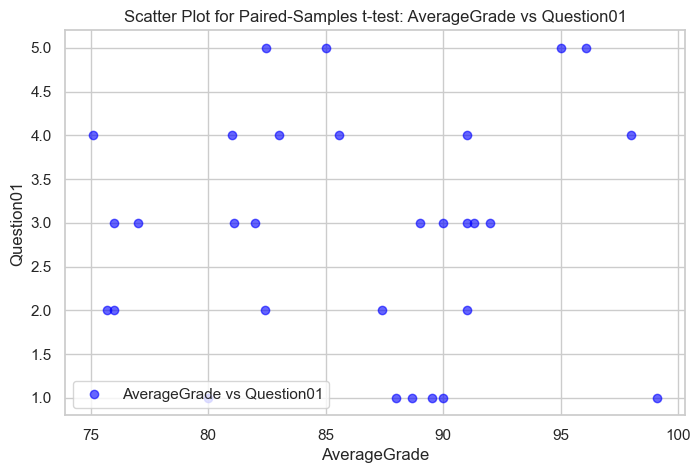

Independent-Samples t-test result (Group Comparison):
T-statistic: -0.03781970240178955
P-value: 0.9710583697893943




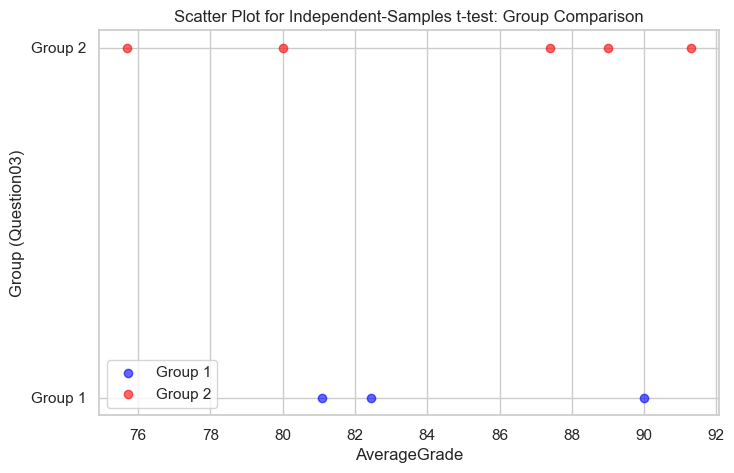

In [76]:
import matplotlib.pyplot as plt
from scipy import stats
# Paired-Samples t-test (AverageGrade vs Question01)
# Performing the paired t-test
t_stat, p_value = stats.ttest_rel(df['AverageGrade'], df['Question01'])
print("Paired-Samples t-test result (AverageGrade vs Question01):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print("\n")
# Paired-Samples t-test Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['AverageGrade'], df['Question01'], color='blue', alpha=0.6, label='AverageGrade vs Question01')
plt.title("Scatter Plot for Paired-Samples t-test: AverageGrade vs Question01")
plt.xlabel("AverageGrade")
plt.ylabel("Question01")
plt.legend()
plt.grid(True)
plt.show()
group1_scores = df[df['Question03'] == 1]['AverageGrade']  # Group 1 scores
group2_scores = df[df['Question03'] == 2]['AverageGrade']  # Group 2 scores
# Performing the independent t-test
t_stat_ind, p_value_ind = stats.ttest_ind(group1_scores, group2_scores, equal_var=True)  # Assuming equal variance
print("Independent-Samples t-test result (Group Comparison):")
print(f"T-statistic: {t_stat_ind}")
print(f"P-value: {p_value_ind}")
print("\n")

# Independent-Samples t-test Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(group1_scores, [1] * len(group1_scores), color='blue', alpha=0.6, label='Group 1')
plt.scatter(group2_scores, [2] * len(group2_scores), color='red', alpha=0.6, label='Group 2')

plt.title("Scatter Plot for Independent-Samples t-test: Group Comparison")
plt.xlabel("AverageGrade")
plt.ylabel("Group (Question03)")
plt.yticks([1, 2], ['Group 1', 'Group 2'])
plt.legend()
plt.grid(True)
plt.show()
